# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot


from si.data import Dataset
from si.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.y = to_categorical(train.y)

In [5]:
preprocess(train)
preprocess(test)

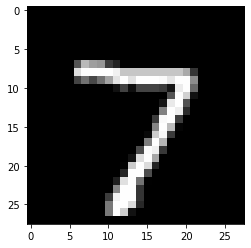

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised import NN, Dense, Activation, Conv2D, Flatten, MaxPooling2D
from si.util import Tanh, Sigmoid, cross_entropy, cross_entropy_prime

### Check Conv2D

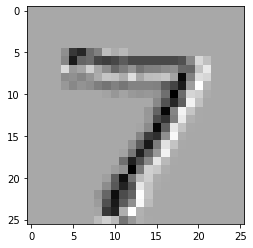

In [8]:
conv = Conv2D((28, 28,1), (3, 3), 1)
out = conv.forward(test.X[:1])
plot_img(out, shape=(26, 26))


### Check MaxPooling

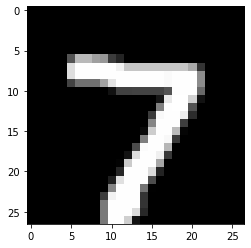

In [9]:
pool = MaxPooling2D(size=2,stride=1)
out = pool.forward(test.X[:1])
plot_img(out, shape=(27, 27))


Build the model

In [10]:
net = NN(epochs=2000,lr=0.1,verbose=False)
net.add(Conv2D((28, 28,1), (3, 3), 1))  
net.add(Activation(Tanh()))
net.add(MaxPooling2D(2,1))
net.add(Flatten())
net.add(Dense(25*25*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

net.useLoss(cross_entropy, cross_entropy_prime)

Train the model

In [11]:
net.fit(train)

h 27/2000, error= 87459.46266006365epoch 29/2000, error= 87458.83143230516epoch 31/2000, error= 87458.19272472704epoch 33/2000, error= 87457.54635525213epoch 35/2000, error= 87456.89213507925epoch 37/2000, error= 87456.22986834834epoch 39/2000, error= 87455.55935178426epoch 41/2000, error= 87454.88037431819epoch 43/2000, error= 87454.19271668425epoch 45/2000, error= 87453.49615098993epoch 47/2000, error= 87452.79044025796epoch 49/2000, error= 87452.07533793732epoch 51/2000, error= 87451.350587381epoch 53/2000, error= 87450.61592128762epoch 55/2000, error= 87449.87106110403epoch 57/2000, error= 87449.11571638533epoch 59/2000, error= 87448.34958410899epoch 61/2000, error= 87447.5723479385epoch 63/2000, error= 87446.7836774328epoch 65/2000, error= 87445.98322719577epoch 67/2000, error= 87445.17063596105epoch 69/2000, error= 87444.34552560556epoch 71/2000, error= 87443.50750008532epoch 73/2000, error= 87442.65614428611epoch 75/2000, error= 87441.79102278041epoch 77/2000, error= 87440.91167

In [12]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.y[0:3])

AssertionError: Model must be fitted before prediction

In [ ]:
conv1 = net.layers[0]
act1 = net.layers[1]
pool1 = net.layers[2]

In [ ]:
img1 = conv1.forward(test.X[:1])
plot_img(img1,shape=(26,26))


In [ ]:
img2= pool1.forward(act1.forward(img1))
plot_img(img2,shape=(25,25))


In [ ]:

a = np.arange(1,10).reshape(3,3)

s = np.array([a]).reshape(1,3,3,1)
s

pol = MaxPooling2D(2,1)
pol.forward(s)

